# Data Analysis Project for NYC Vehicle Collisions

> The purpose of this project is to analyze vehicle collisions in NYC to derive insights from two datasets (Collisions dataset and Vehicle information dataset). Then provide appropriate measures to reduce vehicle collisions to the city government.

#### My project has five parts:
1. **Data Preparation and Acquisition**
   - Loading the datasets and addressing any errors during the process.
   
2. **Data Exploration**
   - Exploring the datasets to understand and gather insights, which will guide data cleaning.
   
3. **Data Cleaning**
   - Handling missing data, duplicated records, and outliers.

4. **Data Visualization and Analysis**
   - Creating various data visualizations, such as bar charts and line charts, related to the my project's objectives.

5. **Data Insights and Findings**
   - Documenting data observations and recommendations based on the analysis.

# 1. Data Preparation and Acquisition

> #### I'll be using the following Python libraries throughout my project:
> - Pandas: For data analysis and manipulation.
> - Matplotlib: For creating data visualizations like charts and graphs.
> - Seaborn: For creating more complex data visualizations.
>
> #### In the steps below, I'm loading my two datasets

In [38]:
# Import the needed python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For the purpose of simplicity, I renamed the two data sets as Collisions.csv and Vehicles.csv

# Set display options to show all columns and expand column width when I look at the data information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Load the datasets
collisions_data = pd.read_csv("Collisions.csv")
vehicles_data = pd.read_csv("Vehicles.csv")

C:\Users\yelik\AppData\Local\Temp\ipykernel_31112\1364985027.py:13: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  collisions_data = pd.read_csv("Collisions.csv")
C:\Users\yelik\AppData\Local\Temp\ipykernel_31112\1364985027.py:14: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles_data = pd.read_csv("Vehicles.csv")


> #### Below, I'm getting rid of the warnings I received and changing the data types for the columns with the warning.

In [39]:
# Read the collisions data to see why there's a warning for Column 3
collisions_data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [40]:
# From reading the collisions dataset, I can see that ZIP CODE column has the warning for mixed types. 
# I'm going to put Column 3 (ZIP CODE) as a string since the zipcodes can have extensions with a dash or start with 0 numeric values.

# Specify data types for the ZIP CODE
dtype_specification = {'ZIP CODE': str}
collisions_data = pd.read_csv("Collisions.csv", dtype=dtype_specification)

In [41]:
# Read the vehicles data head set to see why there's a warning for Column 8
vehicles_data.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,10385780,100201,09/07/2012,9:03,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
1,19140702,4213082,09/23/2019,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,North,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
2,14887647,3307608,10/02/2015,17:18,2,NY,TAXI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver Inattention/Distraction,NaN
3,14889754,3308693,10/04/2015,20:34,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
4,14400270,297666,04/25/2013,21:15,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Vehicular,NaN


In [42]:
# I'm going to put Column 8 (VEHICLE_MODEL) as a string.

# Specify data type for the VEHICLE_MODEL
dtype_specification = {'VEHICLE_MODEL': str}
vehicles_data = pd.read_csv("Vehicles.csv", dtype=dtype_specification)

# 2. Data Exploration


> #### In the steps below, I'm going to be looking at the data to:
>
> - Look at the overall structure and get an understanding.
> - Identify if there's any missing values and assess how I'm going to handle that.
> - Convert data types if necessary.
> - Address any inconsistencies.

In [43]:
# Display the first few rows of the collisions dataset
print("Collisions dataset:")
print(collisions_data.head())

Collisions dataset:
   CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  06/29/2022       6:55       NaN      NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN    11208  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN    11233  40.683304 -73.917274   

                  LOCATION           ON STREET NAME CROSS STREET NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF STREET NAME  NUMBER OF PERSONS INJURED  \
0                      NaN                        2.0   
1           

> #### Looking at the above few values of the collisions dataset, I can see that there are null values identified as NaN (not a number). It may be useful to drop rows with missing values for some cases BUT for my case, they have other values such as date, street name that will help in my analysis. So, I won't be dropping any rows for missing values but I will rename them as "Unspecified" to make it simpler for others to understand

In [44]:
# Display the first few rows of the vehicles dataset
print("Vehicles dataset:")
print(vehicles_data.head())

Vehicles dataset:
   UNIQUE_ID  COLLISION_ID  CRASH_DATE CRASH_TIME  \
0   10385780        100201  09/07/2012       9:03   
1   19140702       4213082  09/23/2019       8:15   
2   14887647       3307608  10/02/2015      17:18   
3   14889754       3308693  10/04/2015      20:34   
4   14400270        297666  04/25/2013      21:15   

                             VEHICLE_ID STATE_REGISTRATION  \
0                                     1                 NY   
1  0553ab4d-9500-4cba-8d98-f4d7f89d5856                 NY   
2                                     2                 NY   
3                                     1                 NY   
4                                     1                 NY   

                          VEHICLE_TYPE   VEHICLE_MAKE VEHICLE_MODEL  \
0                    PASSENGER VEHICLE            NaN           NaN   
1  Station Wagon/Sport Utility Vehicle  TOYT -CAR/SUV           NaN   
2                                 TAXI            NaN           NaN   
3     

> #### Looking at the above values of the vehicles dataset, I can see that there are also null values identified as NaN (not a number). When answering the question for "What vehicle types, makes, or models are most involved in collisions?", it may be useful to drop the rows missing values for vehicle makes, models but I'm going to keep it because it is useful for my findings in what impact it has when there's missing values

# 3. Data Cleaning

> #### In the steps below, I'm going to be cleaning my data by:
>
> - Converting the data types for the dates in case there's inconsistency.
> - Removing duplicate rows from both datasets if there's any.
> - Dropping unnecessary columns for COLLISION_ID, VEHICLE_ID, UNIQUE_ID as it's not needed for my purpose of data analysis from both vehicles and collisions datasets.
> - Replacing NaN values to "Unspecified" to make is easier to understand.

In [45]:
# Remove duplicate rows
collisions_data = collisions_data.drop_duplicates()
vehicles_data = vehicles_data.drop_duplicates()

In [46]:
# Convert dates in case there are rows that are not in a consistent date format

# Vehicles data
vehicles_data['CRASH_DATE'] = pd.to_datetime(vehicles_data['CRASH_DATE'])
vehicles_data['CRASH_TIME'] = pd.to_datetime(vehicles_data['CRASH_TIME'], format='%H:%M', errors='coerce')

# Collisions data
collisions_data['CRASH DATE'] = pd.to_datetime(collisions_data['CRASH DATE'])
collisions_data['CRASH TIME'] = pd.to_datetime(collisions_data['CRASH TIME'], format='%H:%M', errors='coerce')

In [47]:
# Replace all NaN values with 'Unspecified'

#Vehicles data
vehicles_data.fillna('Unspecified', inplace=True)

# Collisions data
collisions_data.fillna('Unspecified', inplace=True)


In [48]:
# Drop unnecessary columns for my analysis

#Vehicles data
columns_to_drop = ['UNIQUE_ID', 'COLLISION_ID', 'VEHICLE_ID']
vehicles_data = vehicles_data.drop(columns=columns_to_drop)

# Collisions data
columns_to_drop = ['COLLISION_ID']
collisions_data = collisions_data.drop(columns=columns_to_drop)

In [49]:
# Check to see what the data looks like now for vehicles dataset

print(vehicles_data.head())

  CRASH_DATE          CRASH_TIME STATE_REGISTRATION  \
0 2012-09-07 1900-01-01 09:03:00                 NY   
1 2019-09-23 1900-01-01 08:15:00                 NY   
2 2015-10-02 1900-01-01 17:18:00                 NY   
3 2015-10-04 1900-01-01 20:34:00                 NY   
4 2013-04-25 1900-01-01 21:15:00                 NY   

                          VEHICLE_TYPE   VEHICLE_MAKE VEHICLE_MODEL  \
0                    PASSENGER VEHICLE    Unspecified   Unspecified   
1  Station Wagon/Sport Utility Vehicle  TOYT -CAR/SUV   Unspecified   
2                                 TAXI    Unspecified   Unspecified   
3                    PASSENGER VEHICLE    Unspecified   Unspecified   
4                    PASSENGER VEHICLE    Unspecified   Unspecified   

  VEHICLE_YEAR TRAVEL_DIRECTION VEHICLE_OCCUPANTS   DRIVER_SEX  \
0  Unspecified      Unspecified       Unspecified  Unspecified   
1       2002.0            North               1.0            M   
2  Unspecified      Unspecified       Unspec

In [50]:
# Check to see what the data looks like now for collisions dataset

print(collisions_data.head())

  CRASH DATE          CRASH TIME      BOROUGH     ZIP CODE     LATITUDE  \
0 2021-09-11 1900-01-01 02:39:00  Unspecified  Unspecified  Unspecified   
1 2022-03-26 1900-01-01 11:45:00  Unspecified  Unspecified  Unspecified   
2 2022-06-29 1900-01-01 06:55:00  Unspecified  Unspecified  Unspecified   
3 2021-09-11 1900-01-01 09:35:00     BROOKLYN        11208    40.667202   
4 2021-12-14 1900-01-01 08:13:00     BROOKLYN        11233    40.683304   

     LONGITUDE                 LOCATION           ON STREET NAME  \
0  Unspecified              Unspecified    WHITESTONE EXPRESSWAY   
1  Unspecified              Unspecified  QUEENSBORO BRIDGE UPPER   
2  Unspecified              Unspecified       THROGS NECK BRIDGE   
3     -73.8665    (40.667202, -73.8665)              Unspecified   
4   -73.917274  (40.683304, -73.917274)          SARATOGA AVENUE   

  CROSS STREET NAME          OFF STREET NAME NUMBER OF PERSONS INJURED  \
0         20 AVENUE              Unspecified                      

# 4. Data Analysis and Visualization AKA The Fun Part

> ### In the steps below, I'm going to be analyzing the data by creating visual charts for:
>
> - Geographical patterns.
> - Patterns for type of vehicles.
> - Patterns in times when the collisions occured.

### Geographical Pattern: I'm going to see which boroughs, zip codes and streets had the most collisions. I'll be answering the following questions:
> 1. Are there boroughs where collisions are more common?
> 2. Which zip codes have the highest collision rates?
> 3. Which streets have the highest collision rates?

> #### Below I'm analyzing total collisions by year to see the overall collision rates for each year

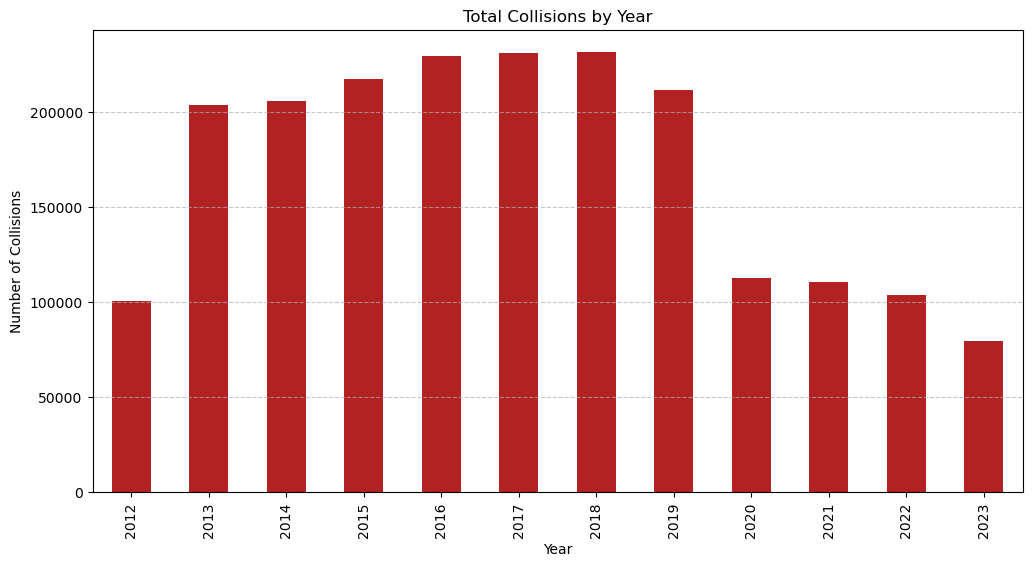

In [51]:
# Extract the year from the 'CRASH DATE' column and create a new 'year' column
collisions_data['year'] = collisions_data['CRASH DATE'].dt.year

# Group and count the number of collisions by year
collisions_by_year = collisions_data['year'].value_counts().sort_index()

# Create a bar chart to visualize the number of collisions for each year
plt.figure(figsize=(12, 6))
collisions_by_year.plot(kind='bar', color='firebrick')
plt.title('Total Collisions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


> ### Geographical Pattern Question 1: Are there boroughs where collisions are more often?

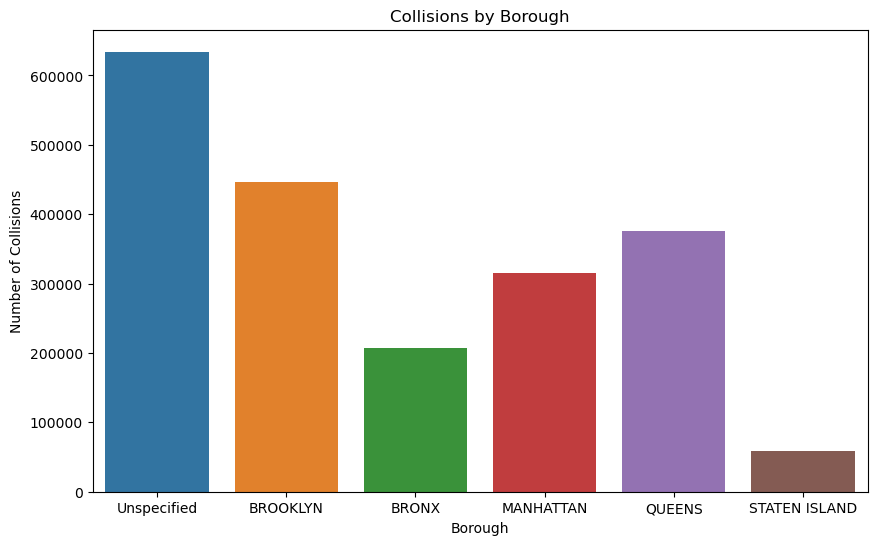

In [52]:
# Create a chart for boroughs with the most collisions
plt.figure(figsize=(10, 6))
sns.countplot(data=collisions_data, x='BOROUGH')
plt.title("Collisions by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Collisions")
plt.show()


> ### Geographical Pattern Question 2: Which zip codes have the most collisions?

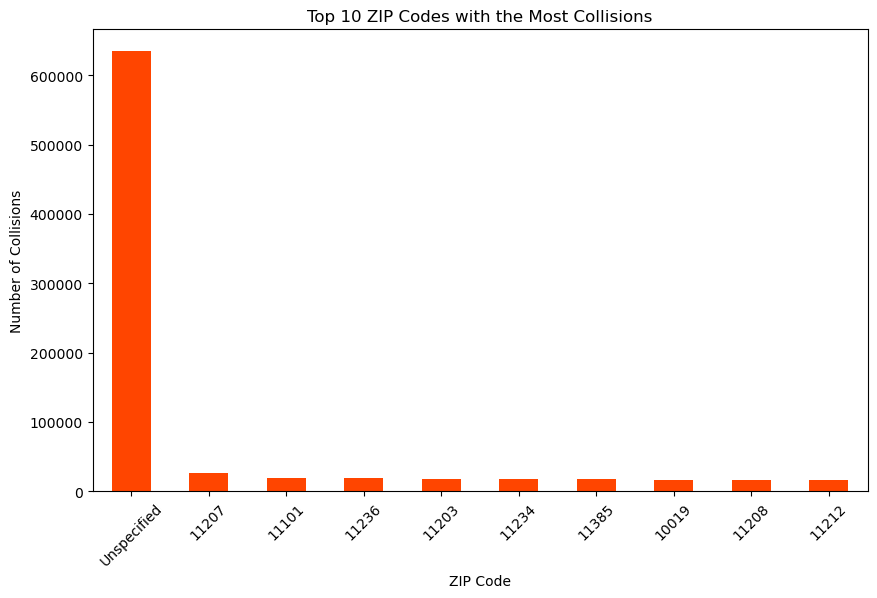

In [53]:
# Count the number of collisions for each ZIP Code Column
collision_counts = collisions_data['ZIP CODE'].value_counts()

# Find the ZIP code with the most collisions
most_collisions_zip = collision_counts.idxmax()
most_collisions_count = collision_counts.max()

# Create a bar chart to visualize the ZIP codes and their collision counts
plt.figure(figsize=(10, 6))
collision_counts.head(10).plot(kind='bar', color='orangered')
plt.title('Top 10 ZIP Codes with the Most Collisions')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)  

plt.show()

> ### Geographical Pattern Question 3: Which streets have the most collisions?

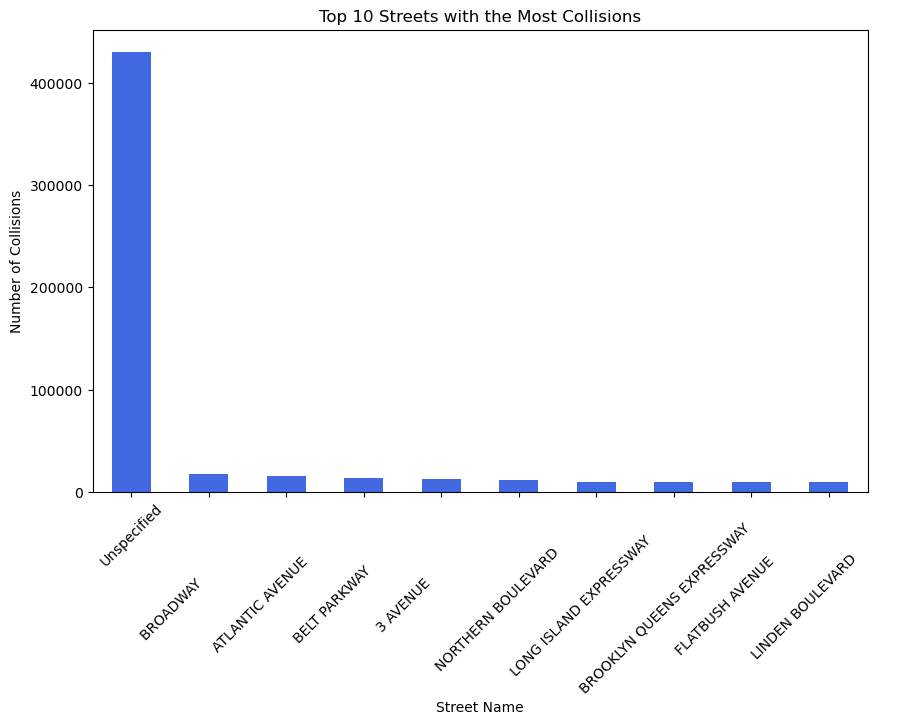

In [54]:
# Count the number of collisions for each street column
collision_counts = collisions_data['ON STREET NAME'].value_counts()

# Find the street with the most collisions
most_collisions_street = collision_counts.idxmax()
most_collisions_count = collision_counts.max()

# Create a bar chart to visualize the streets and their collision counts
plt.figure(figsize=(10, 6))
collision_counts.head(10).plot(kind='bar', color='royalblue')
plt.title('Top 10 Streets with the Most Collisions')
plt.xlabel('Street Name')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)

plt.show()

### Vehicles Types and Makes: I'm going to see which vehicle types are most involved in collisions. I'll be answering the following questions:
> 1. What vehicle types are most commonly involved in collisions?
> 2. Which vehicle model are most frequently involved in collisions?


> ### Vehicle Type Pattern Question 1: What vehicle types are most commonly involved in collisions?

Most common vehicle types involved in collisions:
                          Vehicle Type  Number of Collisions
0                                Sedan                859697
1                    PASSENGER VEHICLE                770756
2  Station Wagon/Sport Utility Vehicle                692408
3        SPORT UTILITY / STATION WAGON                337927
4                          Unspecified                177826
5                              UNKNOWN                105415
6                                 Taxi                 82816
7                           4 dr sedan                 73447
8                                 TAXI                 60785
9                        Pick-up Truck                 59322


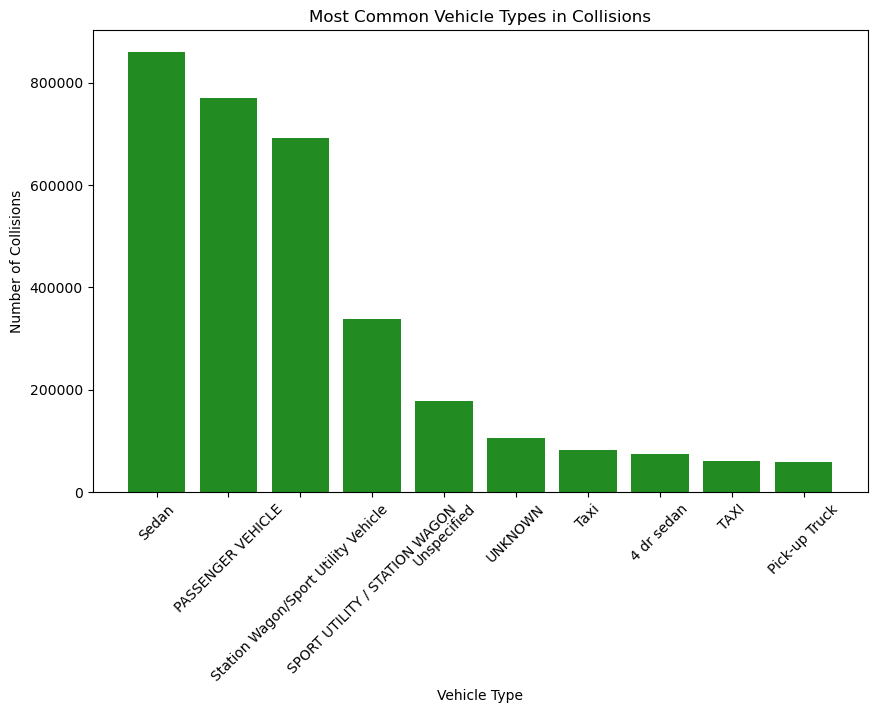

In [55]:
# Count the values in the vehicle type column
vehicle_types = vehicles_data['VEHICLE_TYPE'].value_counts().head(10).reset_index()
vehicle_types.columns = ['Vehicle Type', 'Number of Collisions']

print("Most common vehicle types involved in collisions:")
print(vehicle_types)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(vehicle_types['Vehicle Type'], vehicle_types['Number of Collisions'], color='forestgreen')
plt.title("Most Common Vehicle Types in Collisions")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45) 
plt.show()


> ### Vehicle Type Pattern Question 2: Which vehicle models are most frequently involved in collisions?

Most common vehicle model involved in collisions:
  Vehicle Model  Number of Collisions
0   Unspecified               3653032
1      TOYT CAM                  3030
2      HOND ACC                  1809
3      NISS ALT                  1532
4      TOYT ZZZ                  1499
5      FORD ZZZ                  1214
6      HOND CIV                  1041
7      NISS ZZZ                   921
8      HOND CRV                   855
9      HOND ZZZ                   852


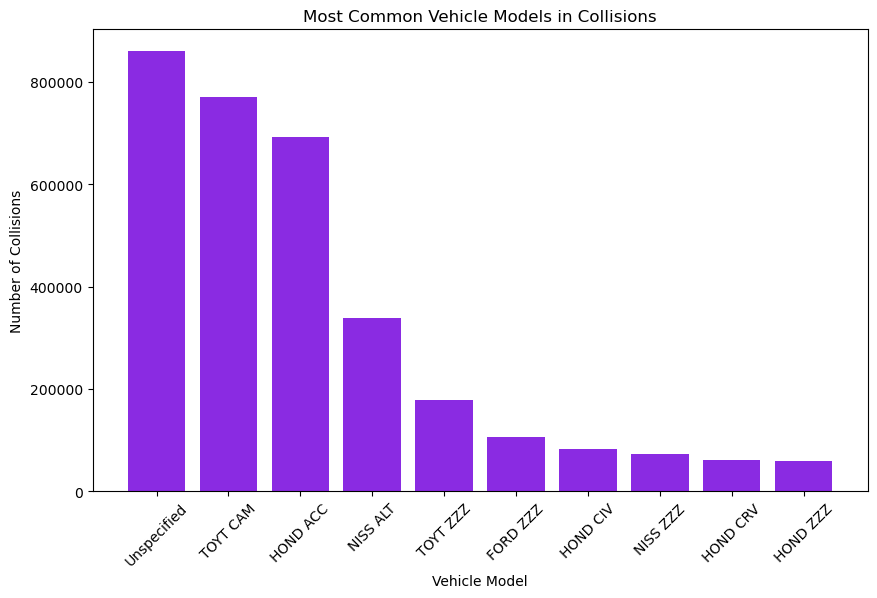

In [56]:
# Count values in vehicle model column
vehicle_model = vehicles_data['VEHICLE_MODEL'].value_counts().head(10).reset_index()
vehicle_model.columns = ['Vehicle Model', 'Number of Collisions']

print("Most common vehicle model involved in collisions:")
print(vehicle_model)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(vehicle_model['Vehicle Model'], vehicle_types['Number of Collisions'], color='blueviolet')
plt.title("Most Common Vehicle Models in Collisions")
plt.xlabel("Vehicle Model")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)  
plt.show()


### Time Analysis. I'm going to see the patterns in collisions based on time of the day, week and I'll be answering the following questions:
> 1. Which days of the week are collisions most likely to happen?
> 2. Which hour of the day are collisions most common?

> ### Time Analysis Question 1: Which days of the week are collisions most likely to happen?

Day of the week with the most collisions:
Monday       291096
Tuesday      300232
Wednesday    298216
Thursday     304982
Friday       325032
Saturday     274619
Sunday       244465


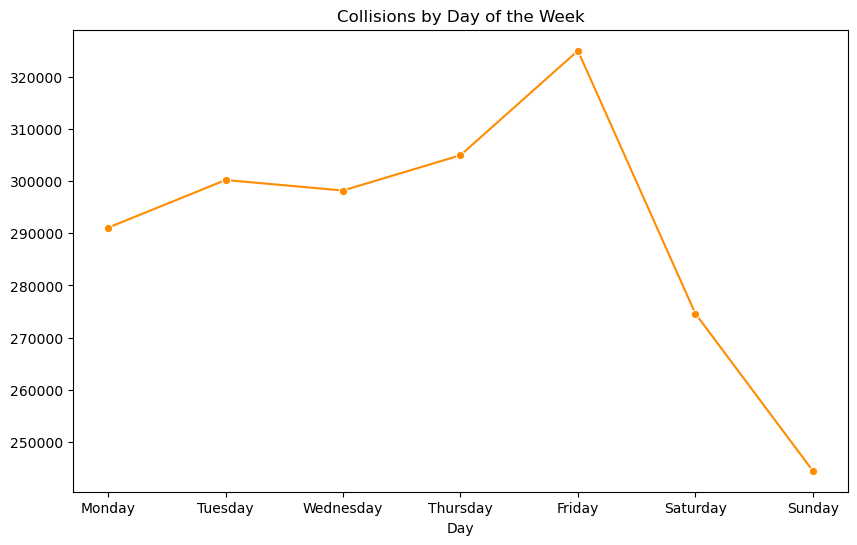

In [57]:
# Define the order of days of the week for the purpose of simplicity and it's easier to read
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Extract the day of the week
collisions_data['day_of_week'] = collisions_data['CRASH DATE'].dt.day_name()

# Count the day of the week with the most collisions
day_of_week_counts = collisions_data['day_of_week'].value_counts().reindex(day_order, fill_value=0)

print("Day of the week with the most collisions:")
print(day_of_week_counts.to_string(header=False)) 

# Create a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=day_order, y=day_of_week_counts.values, marker='o', color='darkorange', linestyle='-')
plt.title("Collisions by Day of the Week")
plt.xlabel("Day")
plt.show()


> ### Time Analysis Question 2: Which hour of the day are collisions most common?

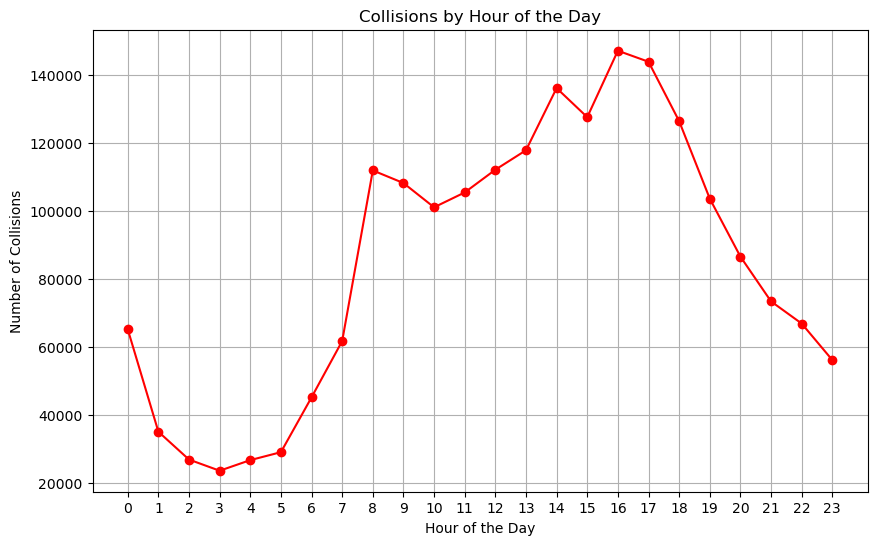

In [58]:
# Filter out rows with invalid datetime values
collisions_data = collisions_data.dropna(subset=['CRASH TIME'])

# Extract the hour from the 'CRASH TIME' column
collisions_data['Hour'] = collisions_data['CRASH TIME'].dt.hour

# Count the number of collisions for each hour of the day
hourly_collisions = collisions_data['Hour'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(hourly_collisions.index, hourly_collisions.values, marker='o', linestyle='-', color='red')
plt.title("Collisions by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Collisions")
plt.xticks(range(24))
plt.grid(True)
plt.show()


# Data Insights and Findings

#### *Geographical Patterns*
- Brooklyn leads in collisions. It had the highest number of crashes among all the boroughs.
- East New York (Zip code 11207) had the highest number of collisions.
- Streets "Broadway" and "Atlantic Avenue" had the most collisions.

#### *Vehicle Type Patterns*
- Sedan and Passenger Vehicle types had the most collisions.
- Toyota Camry and Honda Accord came in the top 2 in most collisions.

#### *Time Pattern*
- Collisions are most likely to happen on Friday and least likely to happen on Sunday. Most likely because of the rush hour traffic, weekend preparations, social activities, and alcohol consumption.
- Between 3:00 pm and 6:00 pm was the peak time of the day when collisions happened.

#### *Impact of Null values in datasets*
- The borough, zip code, street, and vehicle type columns had a lot of missing values, which caused data integrity issues. This can affect the accuracy of the data visualizations and does not accurately represent the data distribution when present. I chose to keep the null values for my purpose since there were other data values within the rows, and deleting a row with null values can impact the results and conclusions. It's essential to address the null values because they can lead to biased conclusions and modeling problems.

#### *Results from the total collisions each year chart shows how since the start of COVID-19, the total collisions have decreased. It's most likely because of the results of lockdown and people working from home.*


# Recommendations

> - Increase the police presence and enforcement between 3:00 pm and 6:00 pm on days with the highest accident rates (Friday, Thursday, and Tuesday being the highest).
> - Raise the availability of ambulances between 3:00 pm and 6:00 pm in collision-prone areas (Brooklyn, Queens, Manhattan being the highest).
> - Invest in improving road infrastructure on the high collision streets such as "Broadway" and "Atlantic Avenue."
> - Focus on high collision-prone areas with zip codes such as 11207, 11101, and 11236 in prioritizing new projects like traffic lights or street signs.
> - Continue collecting and analyzing collision data to identify emerging trends, high-risk areas, and contributing factors.
> - Provide a more robust and efficient Public transit system to encourage usage by commuters.
> - Increase the frequency of driver re-training and more strict fines for repeat offenders.